# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
type(temp)

pandas.core.frame.DataFrame

In [5]:
temp.info

<bound method DataFrame.info of          City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000>

In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


The Column City and State are "object" data type. This is the type for columns in dataframes filled by strings.

The column Temperatur is float64, which is related for numbers.

#### Select the rows where state is New York

In [7]:
temp[temp["State"] == "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [8]:
temp[temp["State"] == "New York"]["Temperature"].mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [9]:
temp[temp["Temperature"] > 15]


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [10]:
list(temp[temp["Temperature"] > 15]["City"])

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [11]:
temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [12]:
temp.groupby(['State']).agg(["mean" , "std"])

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [13]:
employee = pd.read_csv('employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [14]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

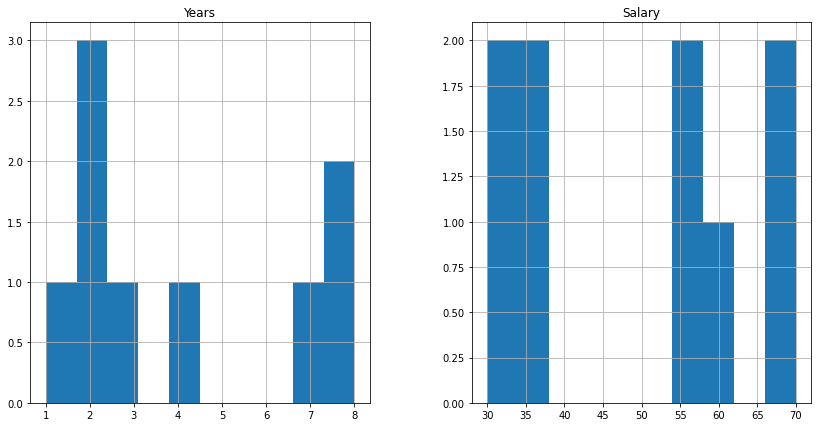

In [15]:
fig = employee.hist( figsize = [14,7])

<AxesSubplot:>

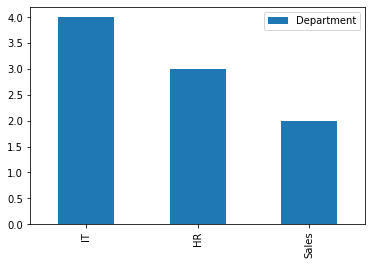

In [16]:
pd.DataFrame(employee["Department"].value_counts()).plot.bar()

<AxesSubplot:>

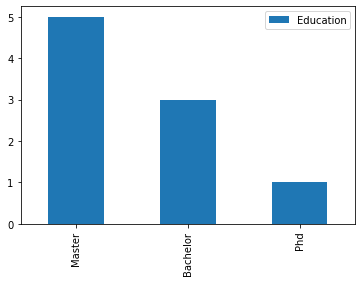

In [17]:
pd.DataFrame(employee["Education"].value_counts()).plot.bar()

<AxesSubplot:>

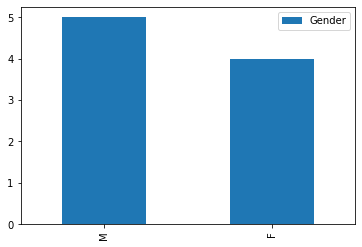

In [18]:
pd.DataFrame(employee["Gender"].value_counts()).plot.bar()

<AxesSubplot:>

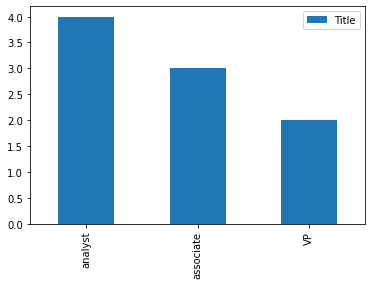

In [19]:
pd.DataFrame(employee["Title"].value_counts()).plot.bar()

#### What's the average salary in this company?

In [20]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [21]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [22]:
employee["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [23]:
employee[employee["Salary"] == employee["Salary"].min()]["Name"]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [24]:
employee[employee["Name"] == "David"]


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [25]:
int(employee[employee["Name"] == "David"]["Salary"])


30

#### Print all the rows where job title is associate

In [26]:
employee[employee["Title"] == "associate"]


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [27]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [28]:
employee.iloc[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [29]:
employee[(employee["Title"] == "associate") & (employee["Salary"] > 55) ]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [30]:
employee.groupby("Years").mean("Salary")

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [31]:
pd.DataFrame(employee.groupby("Title").mean()["Salary"])

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:xlabel='Salary'>

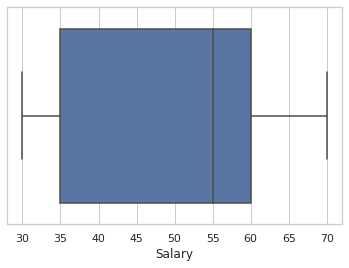

In [32]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=employee["Salary"])

<AxesSubplot:xlabel='Years'>

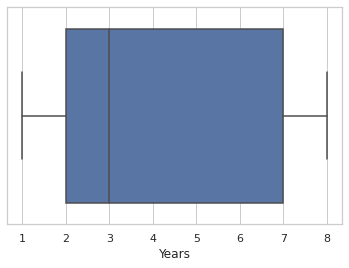

In [33]:
sns.boxplot(x=employee['Years'])

In [34]:
# print first quartile here
print(employee["Salary"].quantile(0.25))

35.0


In [35]:
# print third quartile here
print(employee["Salary"].quantile(0.75))

60.0


#### Is the mean salary per gender different?

In [36]:
employee.groupby("Gender").mean("Salary")

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [37]:
employee.groupby("Department").agg(["min" , "mean" , "max"])

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [38]:
employee.groupby("Department").agg({"Salary" : ["min" , "mean" , "max", lambda x: max(x)-min(x)]})

Salary                      
              min   mean max <lambda_0>
Department                             
HR             30  45.00  70         40
IT             30  48.75  70         40
Sales          55  55.00  55          0

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [39]:
orders = pd.read_csv('orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [40]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [41]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [42]:
orders["UnitPrice"].mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [43]:
orders["UnitPrice"].min()

0.0

In [44]:
orders["UnitPrice"].max()

8142.75

In [45]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Select all the customers we have in Spain

In [46]:
orders[orders["Country"] == "Spain"]["CustomerID"].unique()

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [47]:
len(orders[orders["Country"] == "Spain"]["CustomerID"].value_counts(sort = False))

30

#### Select all the customers who have bought more than 50 items ?

In [48]:
orders.groupby("CustomerID").sum()[orders.groupby("CustomerID").sum() > 50] ;

#### Select orders from Spain that are above 50 items

In [49]:
orders.groupby("CustomerID").sum()[orders.groupby("CustomerID").sum() > 50]  ;

In [50]:
orders[orders.amount_spent ==0] ;

#### Select all free orders

In [51]:
orders[orders["amount_spent"] ==0]  ;


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [52]:
orders[orders["Description"].str.contains("lunch bag")] ;

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [53]:
orders[(orders["Description"].str.contains("lunch bag")) & (orders["year"] == 2011)]  ;

#### Show the frequency distribution of the amount spent in Spain.

array([[<AxesSubplot:title={'center':'amount_spent'}>]], dtype=object)

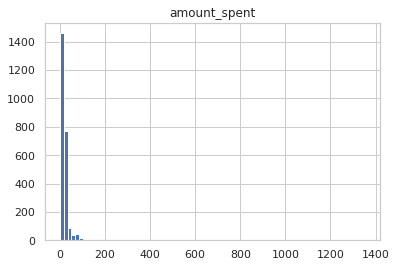

In [54]:
orders[orders["Country"] == "Spain"].hist("amount_spent", bins = 80)


#### Select all orders made in the month of August

In [55]:
orders[orders["month"]==8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [56]:
orders[orders["month"]==8].value_counts("Country")

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
dtype: int64

#### What's the  average amount of money spent by country

In [57]:
orders.groupby('Country').agg({'amount_spent':'mean'})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [58]:
orders["UnitPrice"].max()

8142.75

#### What was the average amount spent per year ?

In [59]:
orders.groupby("year").agg({"amount_spent":"mean"})

,amount_spent
year,
2010,21.892733
2011,22.430074
